In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("medical_examination.csv")

In [3]:
df.head(15)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


Add 'overweight' column

In [4]:
'''Calculates if a person is overweight by dividing the weight in kg by the square of their height in meters. 
   Returns 1 if BMI is >25 (overweight) and 0 is BMI <25.'''
   
def overweight_calc(height, weight):
    bmi = weight / ((height / 100)**2)
    if bmi > 25:
        return 1
    else:
        return 0

In [5]:
df["overweight"] = df.apply(lambda row: overweight_calc(row["height"], row["weight"]), axis=1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [6]:
def normalize_values(value):
    if value == 1:
        return 0
    else:
        return 1

In [7]:
df["cholesterol"] = df.apply(lambda row: normalize_values(row["cholesterol"]), axis=1)
df["gluc"] = df.apply(lambda row: normalize_values(row["cholesterol"]), axis=1)

Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

In [8]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

In [9]:
df_cat = df_cat.groupby(["cardio", "variable", "value"])["value"].count().to_frame()
df_cat.rename(columns={'value': 'total'}, inplace=True)
df_cat.reset_index(inplace=True)
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,5691
7,0,gluc,1,29330
8,0,overweight,0,15915
9,0,overweight,1,19106


Draw the catplot with 'sns.catplot()'

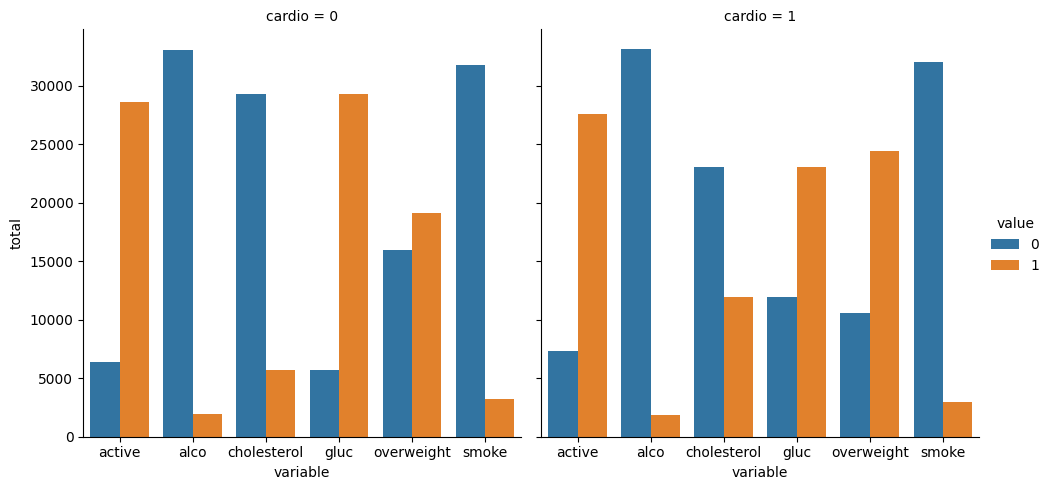

In [10]:
catplot = sns.catplot(x='variable', y='total', hue='value', col='cardio', kind='bar', data=df_cat)

Clean the data.

In [11]:
df_heat = df[df['ap_lo'] <= df['ap_hi']]
df_heat = df_heat[df_heat["height"] >= df['height'].quantile(0.025)]
df_heat = df_heat[df_heat["height"] <= df['height'].quantile(0.975)]
df_heat = df_heat[df_heat["weight"] >= df['weight'].quantile(0.025)]
df_heat = df_heat[df_heat["weight"] <= df['weight'].quantile(0.975)]

Create a correlation matrix using the dataset.

In [12]:
corr = df_heat.corr()

Generate a mask for the upper triangle

In [13]:
mask = np.zeros_like(corr, dtype=bool).T
mask[np.triu_indices_from(mask)] = True

Set up the matplotlib figure.  
Draw the heatmap with 'sns.heatmap()'

[Text(0.5, 0, 'id'),
 Text(1.5, 0, 'age'),
 Text(2.5, 0, 'sex'),
 Text(3.5, 0, 'height'),
 Text(4.5, 0, 'weight'),
 Text(5.5, 0, 'ap_hi'),
 Text(6.5, 0, 'ap_lo'),
 Text(7.5, 0, 'cholesterol'),
 Text(8.5, 0, 'gluc'),
 Text(9.5, 0, 'smoke'),
 Text(10.5, 0, 'alco'),
 Text(11.5, 0, 'active'),
 Text(12.5, 0, 'cardio'),
 Text(13.5, 0, 'overweight')]

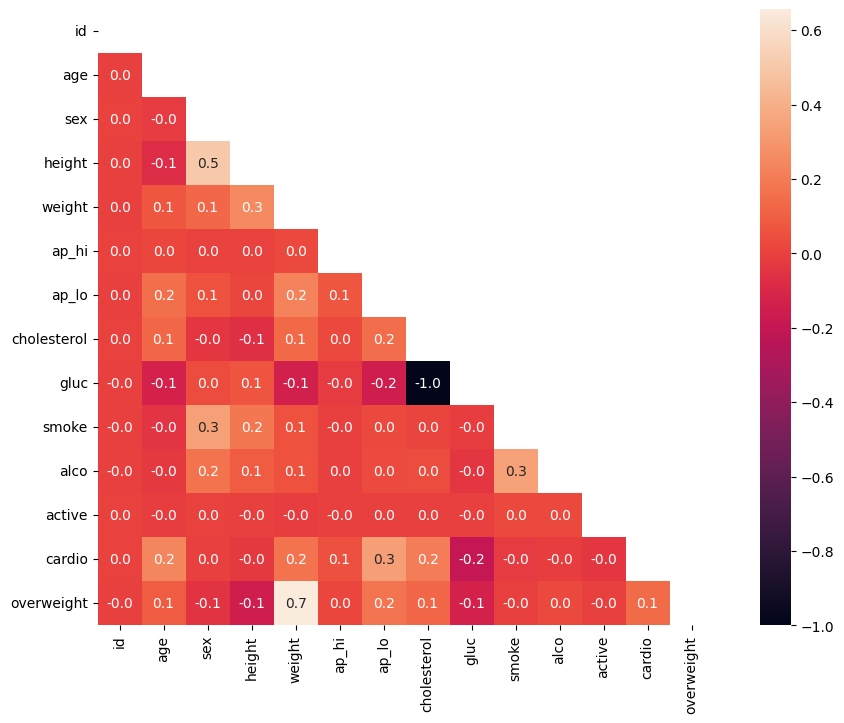

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
heat_map = sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", square=True)
heat_map.set_yticklabels(heat_map.get_yticklabels())
heat_map.set_xticklabels(heat_map.get_xticklabels())